## Pembelajaran Mesin - Tugas Kecil 1

Anggota Kelompok :  
13519099 - Thomas Ferdinand Martin  
13519123 - Muhammad Rifky Muthahhari

Library yang digunakan adalah scikit, numpy, panda, Id3Estimator, matplotlib

In [239]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import trunc
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [219]:
# Load dataset
# Breast cancer
breast_cancer = load_breast_cancer()

# Play tennis
df = pd.read_csv('play_tennis.csv')

# Transform
le = preprocessing.LabelEncoder()

# Data
play_tennis_data = {}
play_tennis_data['day'] = list(le.fit_transform(df['day']))
play_tennis_data['outlook'] = list(le.fit_transform(df['outlook']))
play_tennis_data['humidity'] = list(le.fit_transform(df['humidity']))
play_tennis_data['wind'] = list(le.fit_transform(df['wind']))
play_tennis_data['play'] = list(le.fit_transform(df['play']))

# Initialize label and target
play_tennis_label = []
play_tennis_target = []

# Inset label and target
for i in range(len(play_tennis_data['day'])):
    label = []
    label.append(play_tennis_data['outlook'][i])
    label.append(play_tennis_data['humidity'][i])
    label.append(play_tennis_data['wind'][i])
    
    play_tennis_label.append(label)
    play_tennis_target.append(play_tennis_data['play'][i])

# Feature names
play_tennis_data['feature_names'] = ['outlook', 'humidity', 'wind']

In [220]:
# Split training and test data
def split_data(label, target):
    x_train, x_test, y_train, y_test = train_test_split(label, target, test_size=0.2, train_size=0.8)
    return x_train, x_test, y_train, y_test

# Split breast cancer
bc_x_train, bc_x_test, bc_y_train, bc_y_test = split_data(breast_cancer.data, breast_cancer.target)

# Split play tennis
pt_x_train, pt_x_test, pt_y_train, pt_y_test = split_data(play_tennis_label, play_tennis_target)

## Decision Tree Classifier

In [221]:
def decision_tree_classifier(X, X_test, y, y_test):
    # Learning process
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X,y)
    tree.plot_tree(clf)
    
    # Prediction
    y_pred = clf.predict(X_test)

    # Test
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

Accuracy score : 0.9385964912280702
F1 score       : 0.9489051094890512


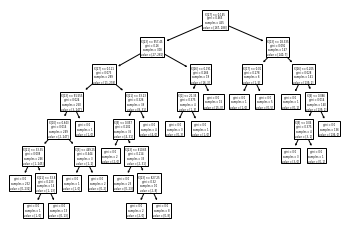

In [222]:
#  Dataset 1 : breast cancer
decision_tree_classifier(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 1.0
F1 score       : 1.0


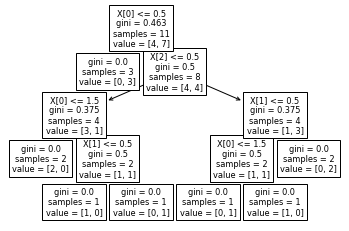

In [223]:
# Dataset 2 : play tennis
decision_tree_classifier(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

## ID3Estimator

In [224]:
import six
import sys
sys.modules['sklearn.externals.six'] = six 
from id3 import Id3Estimator, export_text

def id3Estimator(x_train, x_test, y_train, y_test, feature_names):
    # Fit
    estimator = Id3Estimator()
    estimator.fit(x_train, y_train)
    
    # Visualize
    r = export_text(estimator.tree_, feature_names)
    print(f"Tree{r}")
    
    # Predict
    pred = estimator.predict(x_test)
    
    # Score
    # Accuracy
    acc_score = accuracy_score(y_test, pred)
    # F1 Score
    f_score = f1_score(y_test, pred)
    print(f"Accuracy score : {acc_score}")
    print(f"F1 score       : {f_score}")

In [225]:
# Breast cancer
id3Estimator(bc_x_train, bc_x_test, bc_y_train, bc_y_test, breast_cancer.feature_names)

Tree
worst concave points <=0.15
|   worst area <=957.45
|   |   worst perimeter <=102.40
|   |   |   radius error <=0.64
|   |   |   |   worst texture <=33.35: 1 (235) 
|   |   |   |   worst texture >33.35
|   |   |   |   |   mean texture <=23.20
|   |   |   |   |   |   mean smoothness <=0.09: 1 (1) 
|   |   |   |   |   |   mean smoothness >0.09: 0 (2) 
|   |   |   |   |   mean texture >23.20: 1 (12) 
|   |   |   radius error >0.64
|   |   |   |   mean smoothness <=0.09: 1 (2) 
|   |   |   |   mean smoothness >0.09: 0 (2) 
|   |   worst perimeter >102.40
|   |   |   mean area <=631.45
|   |   |   |   mean symmetry <=0.16: 1 (2) 
|   |   |   |   mean symmetry >0.16: 0 (6) 
|   |   |   mean area >631.45
|   |   |   |   texture error <=2.06: 1 (26) 
|   |   |   |   texture error >2.06: 0 (1) 
|   worst area >957.45
|   |   worst concavity <=0.19
|   |   |   mean radius <=16.26: 0 (1) 
|   |   |   mean radius >16.26: 1 (3) 
|   |   worst concavity >0.19: 0 (15) 
worst concave points >0.15

In [226]:
# Play tennis
id3Estimator(pt_x_train, pt_x_test, pt_y_train, pt_y_test, play_tennis_data['feature_names'])

Tree
outlook <=0.50: 1 (3) 
outlook >0.50
|   humidity <=0.50
|   |   wind <=0.50: 0 (2) 
|   |   wind >0.50: 0 (1/1) 
|   humidity >0.50
|   |   wind <=0.50: 0 (1/1) 
|   |   wind >0.50: 1 (2) 

Accuracy score : 1.0
F1 score       : 1.0


## K-Means

In [227]:
def k_means(X, X_test, y, y_test):
    # Learning process
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    
    # Prediction
    y_pred = kmeans.predict(X_test)
    
    # Visualizing
#     plt.subplot(221)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
#     plt.title("K Means Clustering")
#     plt.subplot(221)
#     plt.clf()
#     plt.show()
    
    # Testing
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

In [228]:
# Dataset 1 : breast cancer
k_means(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.14035087719298245
F1 score       : 0.0


In [229]:
# Dataset 2 : play_tennis
k_means(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.0
F1 score       : 0.0


## Logistic Regression

In [230]:
def logisticRegression(x_train, x_test, y_train, y_test):
    # Fit
    clf = LogisticRegression(random_state=0, max_iter=10000)
    clf.fit(x_train, y_train)
    
    # Visualisasi model
    #
    
    # Predict
    pred = clf.predict(x_test)
    
    # Score
    # Accuracy
    acc_score = accuracy_score(y_test, pred)
    # F1 Score
    f_score = f1_score(y_test, pred)
    
    print(f"Accuracy score : {acc_score}")
    print(f"F1 score       : {f_score}")

In [231]:
# Breast cancer
logisticRegression(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.9473684210526315
F1 score       : 0.9565217391304348


In [232]:
# Play tennis
logisticRegression(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.6666666666666666
F1 score       : 0.8


## Neural Network

In [233]:
def neural_network(X, X_test, y, y_test):
    # Learning process
    clf = MLPClassifier(random_state=1, max_iter=300, tol=8e-4).fit(X, y)
    
    # Prediction
    y_pred = clf.predict(X_test)
    
    # Testing
    print("Accuracy score :", accuracy_score(y_test, y_pred))
    print("F1 score       :", f1_score(y_test, y_pred))

In [234]:
# Dataset 1 : breast cancer
neural_network(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.9385964912280702
F1 score       : 0.951048951048951


In [235]:
# Dataset 2 : play tennis
neural_network(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 1.0
F1 score       : 1.0


## Support Vector Machine 

In [236]:
def SVMlearning (x_train, x_test, y_train, y_test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    # Score
    # Accuracy
    acc_score = accuracy_score(y_test, pred)
    # F1 Score
    f_score = f1_score(y_test, pred)
    
    print(f"Accuracy score : {acc_score}")
    print(f"F1 score       : {f_score}")

In [237]:
# Breast cancer
SVMlearning(bc_x_train, bc_x_test, bc_y_train, bc_y_test)

Accuracy score : 0.956140350877193
F1 score       : 0.9645390070921985


In [238]:
# Play tennis
SVMlearning(pt_x_train, pt_x_test, pt_y_train, pt_y_test)

Accuracy score : 0.6666666666666666
F1 score       : 0.8


## Analisis

Evaluasi model dilakukan dengan mengukur accuracy dan F1 score dari model hasil pembelajaran. Accuracy digunakan ketika kelas memiliki distribusi yang seimbang sedangkan F1 cocok digunakan untuk data dengan distribusi yang tidak seimbang. Data breast cancer merupakan data berdistribusi normal sedangkan play tennis tidak sehingga untuk dataset breast cancer, lebih baik mempertimbangkan metrik accuracy sedangkan untuk play tennis mempertimbangkan metrik f1 score.

Kami melakukan 6 kali pembelajaran dengan data training dan data test yang diacak pada setiap kali pembelajaran

| Accuracy - BC     | 1      | 2      | 3      | 4      | 5      | 6      | AVG    |
| ----------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| DTL               | 0,9473 | 0,9386 | 0,9386 | 0,8772 | 0,9211 | 0,9561 | 0,9298 |
| ID3               | 0,9473 | 0,9298 | 0,9123 | 0,9386 | 0,9211 | 0,9474 | 0,9327 |
| KMeans            | 0,1200 | 0,1930 | 0,1404 | 0,8684 | 0,8333 | 0,1667 | 0,3870 |
| Logistic          | 0,9473 | 0,9561 | 0,9474 | 0,9649 | 0,9386 | 0,9649 | 0,9532 |
| Neural            | 0,9561 | 0,8859 | 0,9359 | 0,9474 | 0,9298 | 0,9211 | 0,9294 |
| SVM               | 0,9825 | 0,9561 | 0,9561 | 0,9737 | 0,9737 | 0,9825 | 0,9708 |

| Accuracy - Tennis | 1      | 2      | 3      | 4      | 5      | 6      | AVG    |
| ----------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| DTL               | 1,0000 | 0,6667 | 1,0000 | 0,6667 | 0,6667 | 1,0000 | 0,8333 |
| ID3               | 0,6666 | 0,6667 | 1,0000 | 0,6667 | 0,6667 | 0,6667 | 0,7222 |
| KMeans            | 0,6666 | 0,6667 | 0,0000 | 1,0000 | 0,6667 | 0,0000 | 0,5000 |
| Logistic          | 0,6667 | 0,3333 | 0,6667 | 0,6667 | 0,6667 | 0,6667 | 0,6111 |
| Neural            | 0,6667 | 0,6667 | 1,0000 | 1,0000 | 0,6667 | 1,0000 | 0,8333 |
| SVM               | 0,6667 | 0,3333 | 0,6667 | 1,0000 | 0,6667 | 1,0000 | 0,7222 |

| F1 - BC           | 1      | 2      | 3      | 4      | 5      | 6      | AVG    |
| ----------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| DTL               | 0,9538 | 0,9496 | 0,9489 | 0,9028 | 0,9412 | 0,9645 | 0,9435 |
| ID3               | 0,9550 | 0,9437 | 0,9275 | 0,9481 | 0,9388 | 0,9610 | 0,9457 |
| KMeans            | 0,0000 | 0,0000 | 0,0000 | 0,9112 | 0,8889 | 0,1667 | 0,3278 |
| Logistic          | 0,9545 | 0,9650 | 0,9565 | 0,9737 | 0,9536 | 0,9722 | 0,9626 |
| Neural            | 0,9635 | 0,9128 | 0,9510 | 0,9625 | 0,9474 | 0,9362 | 0,9455 |
| SVM               | 0,9848 | 0,9650 | 0,9645 | 0,9806 | 0,9804 | 0,9859 | 0,9769 |

| F1- Tennis        | 1      | 2      | 3      | 4      | 5      | 6      | AVG    |
| ----------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| DTL               | 1,0000 | 0,6667 | 1,0000 | 0,6667 | 0,8000 | 1,0000 | 0,8556 |
| ID3               | 0,8000 | 0,6667 | 1,0000 | 0,6667 | 0,8000 | 0,8000 | 0,7889 |
| KMeans            | 0,6666 | 0,6667 | 0,0000 | 1,0000 | 0,8000 | 0,0000 | 0,5222 |
| Logistic          | 0,8000 | 0,5000 | 0,8000 | 0,8000 | 0,8000 | 0,8000 | 0,7500 |
| Neural            | 0,8000 | 0,6667 | 1,0000 | 1,0000 | 0,8000 | 1,0000 | 0,8778 |
| SVM               | 0,8000 | 0,5000 | 0,8000 | 1,0000 | 0,8000 | 1,0000 | 0,8167 |

Berdasarkan hasil rata-rata 6 kali percobaan, untuk dataset breast cancer, SVM mendapatkan nilai tertinggi dan K-Means memiliki skor terburuk. Hal ini menunjukkan bahwa SVM memiliki ketepatan dan akurasi yang bagus dibandingkan algoritma lain ketika data berdistribusi normal.  

Pada dataset play tennis, Neural Network dan Decision Tree Learning mendapatkan nilai tertinggi dan K-Means memiliki skor terburuk. Namun, K-Means pada dataset play tennis memiliki skor lebih tinggi dari dataset breast cancer. Hal ini menunjukkan Neural Network dan Decision Tree Learning cocok digunakan untuk dataset yang memiliki jumlah data sedikit dan tidak terdistribusi normal.

## Referensi
https://jupyter-notebook.readthedocs.io/en/stable/index.html  
https://scikit-learn.org/stable/index.html  
https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2   
https://iq.opengenus.org/advantages-of-svm/#:~:text=There%20are%20many%20algorithms%20used,a%20better%20accuracy%20in%20results.&text=classification%2C%20Support%20Vector%20Machine%20Algorithm,prediction%20along%20with%20better%20accuracy  
https://svaante.github.io/decision-tree-id3/  
    